In [23]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns


Error in callback <function _draw_all_if_interactive at 0x00000190FCC9C720> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 1500x81200 pixels is too large. It must be less than 2^16 in each direction.

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train


In [ ]:
# Mengatur kolom unnamed menjadi index bagi setiap entitas
train.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
train.set_index('index', inplace=True)

## Exploratory Data Analysis


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5603 entries, 0 to 5602
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Negara/Tahun                                 5603 non-null   object 
 1   Emisi Savanna Api                            5578 non-null   float64
 2   Emisi Kebakaran Hutan                        5528 non-null   float64
 3   Emisi Residu Tanaman                         4485 non-null   float64
 4   Emisi Budidaya Padi                          5603 non-null   float64
 5   Emisi Tanah Organik Yang Dikeringkan (Co2)   5603 non-null   float64
 6   Emisi Pembuatan Pestisida                    5603 non-null   float64
 7   Emisi Transportasi Makanan                   5603 non-null   float64
 8   Lahan Hutan                                  5206 non-null   float64
 9   Konversi Hutan Bersih                        5206 non-null   float64
 10  Emisi

Terdapat satu kolom bertipe objek, sisanya bertipe float

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Emisi Savanna Api,5578.0,1.229654e+03,5.472354e+03,0.000000,0.000000,1.657900e+00,1.143092e+02,1.146164e+05
Emisi Kebakaran Hutan,5528.0,9.242752e+02,3.692585e+03,0.000000,0.000000,6.618500e-01,7.109490e+01,5.222763e+04
Emisi Residu Tanaman,4485.0,9.492051e+02,3.498477e+03,0.000200,10.921100,9.803740e+01,3.562161e+02,3.063853e+04
Emisi Budidaya Padi,5603.0,4.241102e+03,1.759963e+04,0.000000,172.219300,5.155172e+02,1.551411e+03,1.649153e+05
Emisi Tanah Organik Yang Dikeringkan (Co2),5603.0,3.471792e+03,1.548866e+04,0.000000,0.000000,0.000000e+00,6.941645e+02,2.321185e+05
Emisi Pembuatan Pestisida,5603.0,3.275223e+02,1.445485e+03,0.000000,5.000000,1.232828e+01,1.069817e+02,1.645900e+04
Emisi Transportasi Makanan,5603.0,1.823138e+03,5.306418e+03,0.000100,26.262663,1.760653e+02,1.135650e+03,6.204817e+04
Lahan Hutan,5206.0,-1.814565e+04,8.104574e+04,-797183.079000,-3224.371500,-6.953460e+01,0.000000e+00,1.711211e+05
Konversi Hutan Bersih,5206.0,1.845452e+04,1.080050e+05,0.000000,0.000000,4.461600e+01,4.734968e+03,1.605106e+06
Emisi Konsumsi Rumah Tangga Makanan,5214.0,4.290229e+03,2.069181e+04,0.000000,10.011225,1.362674e+02,1.357826e+03,3.446263e+05


In [ ]:
train.isnull().sum()

Negara/Tahun                                      0
Emisi Savanna Api                                25
Emisi Kebakaran Hutan                            75
Emisi Residu Tanaman                           1118
Emisi Budidaya Padi                               0
Emisi Tanah Organik Yang Dikeringkan (Co2)        0
Emisi Pembuatan Pestisida                         0
Emisi Transportasi Makanan                        0
Lahan Hutan                                     397
Konversi Hutan Bersih                           397
Emisi Konsumsi Rumah Tangga Makanan             389
Emisi Ritel Makanan                               0
Emisi Penggunaan Listrik Di Pertanian             0
Emisi Kemasan Makanan                             0
Emisi Sistem Agrifood Pembuangan Limbah           0
Emisi Pengolahan Makanan                          0
Emisi Manufaktur Pupuk                            0
Emisi IPPU                                      599
Emisi Kotoran Diterapkan Pada Tanah             752
Emisi Pupuk 

In [ ]:
train.duplicated().sum()

0

In [ ]:
train.shape

(5603, 30)

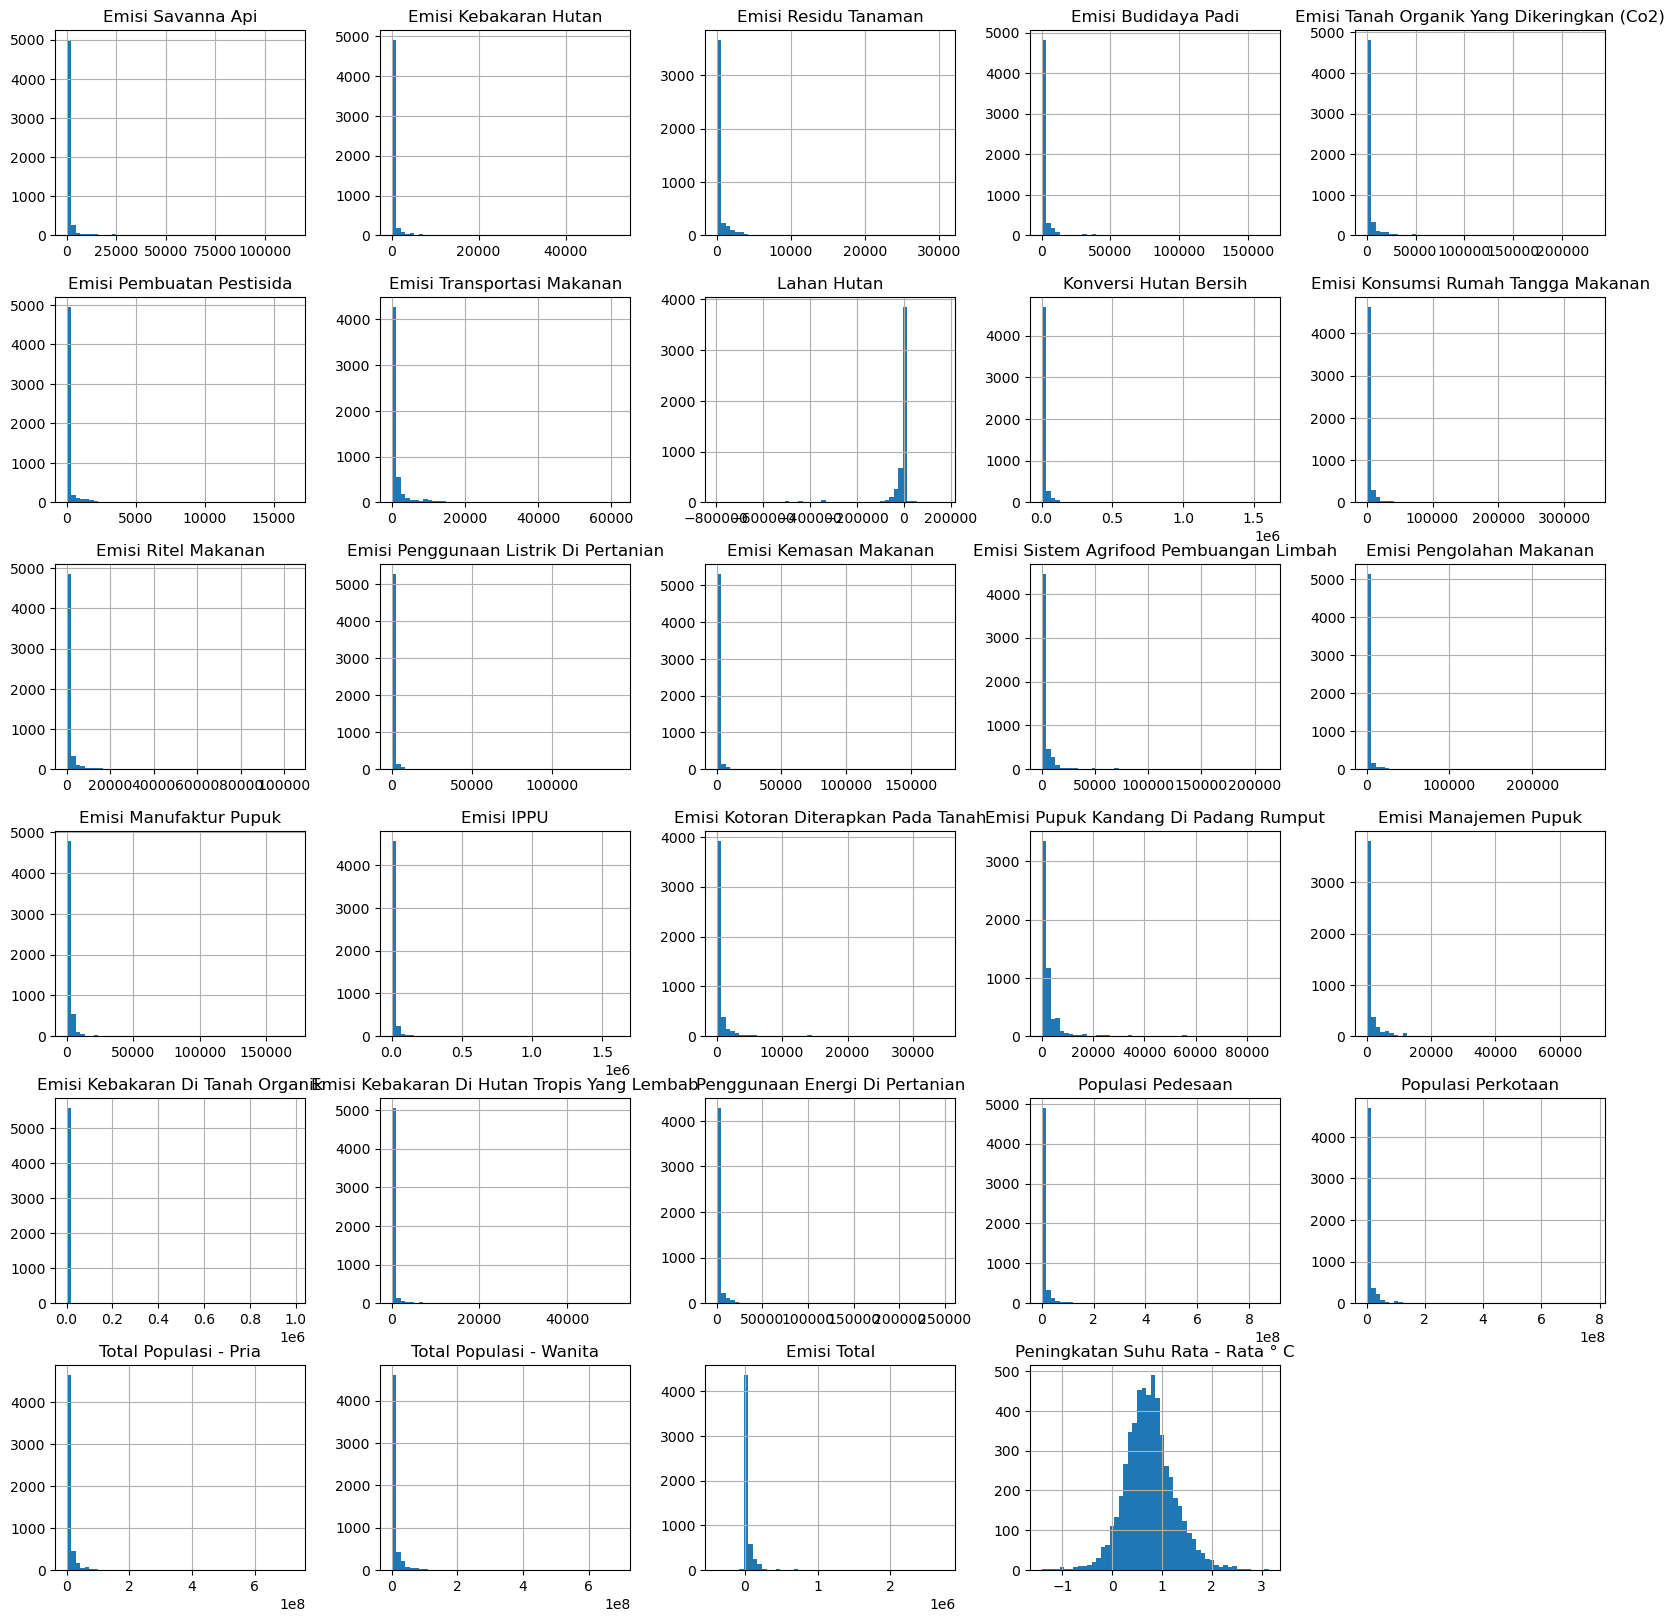

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

train.hist(bins=50, figsize=(20, 20))
plt.show()

In [ ]:
from autoviz import AutoViz_Class

# Initialize AutoViz
AV = AutoViz_Class()

# Visualizing the training dataset using AutoViz
AV.AutoViz(None, dfte=train)

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (5603, 30)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  29
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  1
    Number o

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Negara/Tahun,object,0.000000,100,,,No issue
Emisi Savanna Api,float64,0.446190,NA,0.000000,114616.401100,"25 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 1148 outliers greater than upper bound (285.77) or lower than lower bound(-171.46). Cap them or remove them."
Emisi Kebakaran Hutan,float64,1.338569,NA,0.000000,52227.630600,"75 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 1124 outliers greater than upper bound (177.74) or lower than lower bound(-106.64). Cap them or remove them."
Emisi Residu Tanaman,float64,19.953596,NA,0.000200,30638.533800,"1118 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 714 outliers greater than upper bound (874.16) or lower than lower bound(-507.02). Cap them or remove them."
Emisi Budidaya Padi,float64,0.000000,NA,0.000000,164915.255600,"Column has 731 outliers greater than upper bound (3620.20) or lower than lower bound(-1896.57). Cap them or remove them., Column has a high correlation with ['Emisi Residu Tanaman']. Consider dropping one of them."
Emisi Tanah Organik Yang Dikeringkan (Co2),float64,0.000000,NA,0.000000,232118.469400,Column has 1093 outliers greater than upper bound (1735.41) or lower than lower bound(-1041.25). Cap them or remove them.
Emisi Pembuatan Pestisida,float64,0.000000,NA,0.000000,16459.000000,"Column has 786 outliers greater than upper bound (259.95) or lower than lower bound(-147.97). Cap them or remove them., Column has a high correlation with ['Emisi Residu Tanaman']. Consider dropping one of them."
Emisi Transportasi Makanan,float64,0.000000,NA,0.000100,62048.167300,Column has 711 outliers greater than upper bound (2799.73) or lower than lower bound(-1637.82). Cap them or remove them.
Lahan Hutan,float64,7.085490,NA,-797183.079000,171121.076000,"397 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 1022 outliers greater than upper bound (4836.56) or lower than lower bound(-8060.93). Cap them or remove them."
Konversi Hutan Bersih,float64,7.085490,NA,0.000000,1605106.096000,"397 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 887 outliers greater than upper bound (11837.42) or lower than lower bound(-7102.45). Cap them or remove them."


Number of All Scatter Plots = 435
Image size of 1500x81200 pixels is too large. It must be less than 2^16 in each direction.
Could not draw Pair Scatter Plots


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to C:\Users\ASUS
[nltk_data]    |     ExpertBook\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to C:\Users\ASUS
[nltk_data]    |     ExpertBook\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to C:\Users\ASUS
[nltk_data]    |     ExpertBook\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to C:\Users\ASUS
[nltk_data]    |     ExpertBook\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to C:\Users\ASUS
[nltk_data]    |     ExpertBook\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | D

Could not draw wordcloud plot for Negara/Tahun. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

All Plots done
Time to run AutoViz = 17 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,Negara/Tahun,Emisi Savanna Api,Emisi Kebakaran Hutan,Emisi Residu Tanaman,Emisi Budidaya Padi,Emisi Tanah Organik Yang Dikeringkan (Co2),Emisi Pembuatan Pestisida,Emisi Transportasi Makanan,Lahan Hutan,Konversi Hutan Bersih,Emisi Konsumsi Rumah Tangga Makanan,Emisi Ritel Makanan,Emisi Penggunaan Listrik Di Pertanian,Emisi Kemasan Makanan,Emisi Sistem Agrifood Pembuangan Limbah,Emisi Pengolahan Makanan,Emisi Manufaktur Pupuk,Emisi IPPU,Emisi Kotoran Diterapkan Pada Tanah,Emisi Pupuk Kandang Di Padang Rumput,Emisi Manajemen Pupuk,Emisi Kebakaran Di Tanah Organik,Emisi Kebakaran Di Hutan Tropis Yang Lembab,Penggunaan Energi Di Pertanian,Populasi Pedesaan,Populasi Perkotaan,Total Populasi - Pria,Total Populasi - Wanita,Emisi Total,Peningkatan Suhu Rata - Rata ° C
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Afghanistan/1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,0.0000,79.0851,109.6446,14.2666,67.631366,691.7888,252.21419,11.997000,209.9778,260.1431,1590.5319,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan/1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,0.0000,80.4885,116.6789,11.4182,67.631366,710.8212,252.21419,12.853900,217.0388,268.6292,1657.2364,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan/1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,0.0000,80.7692,126.1721,9.2752,67.631366,743.6751,252.21419,13.492900,222.1156,264.7898,1653.5068,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan/1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,0.0000,85.0678,81.4607,9.0635,67.631366,791.9246,252.21419,14.055900,201.2057,261.7221,1642.9623,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan/1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,0.0000,88.8058,90.4008,8.3962,67.631366,831.9181,252.21419,15.126900,182.2905,267.6219,1689.3593,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5598,Zimbabwe/2010,2795.6192,283.6316,109.3055,3.0243,0.0,87.000000,157.6366,262.6108,10677.6439,141.1969,340.6886,260.8153,28.342500,1004.2754,64.36670,1227.240253,709.7960,103.6080,2968.0562,302.3508,0.0,0.0,2074.1869,9410211.0,4676106.0,6034165.0,6805605.0,23601.395453,0.911917
5599,Zimbabwe/2011,2918.2098,168.1659,100.7798,3.7456,0.0,94.000000,268.6740,648.0808,10670.8870,179.8443,328.7726,331.5380,26.920300,1019.7733,286.50940,1127.687805,843.8980,102.2926,3072.2327,312.2478,0.0,0.0,966.3719,9636932.0,4749717.0,6114111.0,6911674.0,23470.631605,0.191167
5600,Zimbabwe/2012,2164.8953,259.4249,103.8422,5.5527,0.0,91.000000,304.6578,648.0808,10670.8870,170.8670,322.0831,317.3356,25.000800,1037.0116,280.77900,1127.687805,947.9330,102.4605,3101.1270,314.3433,0.0,0.0,908.2629,9880721.0,4830105.0,6223803.0,7041528.0,22903.232305,0.337000


Error in callback <function _draw_all_if_interactive at 0x00000190FCC9C720> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 1500x81200 pixels is too large. It must be less than 2^16 in each direction.

In [ ]:
import math

num_columns = train.shape[1]  # Jumlah kolom dalam dataset
rows = math.ceil(num_columns / 5)  # Tentukan jumlah baris (dengan max 5 kolom per baris)

train.plot(kind='box', subplots=True, layout=(rows, 5), sharex=False, sharey=False, figsize=(20, rows * 4))


Emisi Savanna Api                              Axes(0.08,0.764286;0.15x0.115714)
Emisi Kebakaran Hutan                          Axes(0.26,0.764286;0.15x0.115714)
Emisi Residu Tanaman                           Axes(0.44,0.764286;0.15x0.115714)
Emisi Budidaya Padi                            Axes(0.62,0.764286;0.15x0.115714)
Emisi Tanah Organik Yang Dikeringkan (Co2)      Axes(0.8,0.764286;0.15x0.115714)
Emisi Pembuatan Pestisida                      Axes(0.08,0.625429;0.15x0.115714)
Emisi Transportasi Makanan                     Axes(0.26,0.625429;0.15x0.115714)
Lahan Hutan                                    Axes(0.44,0.625429;0.15x0.115714)
Konversi Hutan Bersih                          Axes(0.62,0.625429;0.15x0.115714)
Emisi Konsumsi Rumah Tangga Makanan             Axes(0.8,0.625429;0.15x0.115714)
Emisi Ritel Makanan                            Axes(0.08,0.486571;0.15x0.115714)
Emisi Penggunaan Listrik Di Pertanian          Axes(0.26,0.486571;0.15x0.115714)
Emisi Kemasan Makanan       

Error in callback <function _draw_all_if_interactive at 0x00000190FCC9C720> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 1500x81200 pixels is too large. It must be less than 2^16 in each direction.

In [ ]:
# Mengecek apakah Emisi Kebakaran Hutan dan Emisi Kebakaran di Hutan tropis overlap
train[(train['Emisi Kebakaran Hutan'] <  train['Emisi Kebakaran Di Hutan Tropis Yang Lembab'])]

,Negara/Tahun,Emisi Savanna Api,Emisi Kebakaran Hutan,Emisi Residu Tanaman,Emisi Budidaya Padi,Emisi Tanah Organik Yang Dikeringkan (Co2),Emisi Pembuatan Pestisida,Emisi Transportasi Makanan,Lahan Hutan,Konversi Hutan Bersih,Emisi Konsumsi Rumah Tangga Makanan,Emisi Ritel Makanan,Emisi Penggunaan Listrik Di Pertanian,Emisi Kemasan Makanan,Emisi Sistem Agrifood Pembuangan Limbah,Emisi Pengolahan Makanan,Emisi Manufaktur Pupuk,Emisi IPPU,Emisi Kotoran Diterapkan Pada Tanah,Emisi Pupuk Kandang Di Padang Rumput,Emisi Manajemen Pupuk,Emisi Kebakaran Di Tanah Organik,Emisi Kebakaran Di Hutan Tropis Yang Lembab,Penggunaan Energi Di Pertanian,Populasi Pedesaan,Populasi Perkotaan,Total Populasi - Pria,Total Populasi - Wanita,Emisi Total,Peningkatan Suhu Rata - Rata ° C
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


Error in callback <function _draw_all_if_interactive at 0x00000190FCC9C720> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 1500x81200 pixels is too large. It must be less than 2^16 in each direction.

In [ ]:
train[['Konversi Hutan Bersih', 'Lahan Hutan']]

,Konversi Hutan Bersih,Lahan Hutan
index,,
0,0.0000,-2388.8030
1,0.0000,-2388.8030
2,0.0000,-2388.8030
3,0.0000,-2388.8030
4,0.0000,-2388.8030
...,...,...
5598,10677.6439,262.6108
5599,10670.8870,648.0808
5600,10670.8870,648.0808


Error in callback <function _draw_all_if_interactive at 0x00000190FCC9C720> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 1500x81200 pixels is too large. It must be less than 2^16 in each direction.

catatan : 
1. luas hutan negatif
2. emisi total negatif
3. fitur redundan total pria wanita
4. emisi kebakaran hutan dan emisi kebakaran di hutan tropis overlap (opsional untuk dihapus)
5. fitur redundan populasi pedesaan dan perkotaan


## Data Preprocessing

In [ ]:
# Membenahi nilai luas hutan yang bernilai negatif
train['Lahan Hutan'] = train['Lahan Hutan'].abs()
train['Emisi Total'] = train['Emisi Total'].abs()

# # Menyatukan fitur redundan populasi pria dan wanita
train['Populasi'] = train['Total Populasi - Pria'] + train['Total Populasi - Wanita']
train.drop(columns=['Total Populasi - Pria', 'Total Populasi - Wanita'], inplace=True)

test['Populasi'] = test['Total Populasi - Pria'] + test['Total Populasi - Wanita']
test.drop(columns=['Total Populasi - Pria', 'Total Populasi - Wanita'], inplace=True)

# Memisahkan Negara dan Tahun
train[['Negara', 'Tahun']] = train['Negara/Tahun'].str.split('/', expand=True)
train.drop(columns=['Negara/Tahun'], inplace=True)

test[['Negara', 'Tahun']] = test['Negara/Tahun'].str.split('/', expand=True)
test.drop(columns=['Negara/Tahun'], inplace=True)

Error in callback <function _draw_all_if_interactive at 0x00000190FCC9C720> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 1500x81200 pixels is too large. It must be less than 2^16 in each direction.

In [ ]:
# Membuat kategori temperatur naik dari tahun sebelumnya atau tidak


Error in callback <function _draw_all_if_interactive at 0x00000190FCC9C720> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 1500x81200 pixels is too large. It must be less than 2^16 in each direction.

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
train[(train['Negara']=='Afghanistan')].head()

,Emisi Savanna Api,Emisi Kebakaran Hutan,Emisi Residu Tanaman,Emisi Budidaya Padi,Emisi Tanah Organik Yang Dikeringkan (Co2),Emisi Pembuatan Pestisida,Emisi Transportasi Makanan,Lahan Hutan,Konversi Hutan Bersih,Emisi Konsumsi Rumah Tangga Makanan,Emisi Ritel Makanan,Emisi Penggunaan Listrik Di Pertanian,Emisi Kemasan Makanan,Emisi Sistem Agrifood Pembuangan Limbah,Emisi Pengolahan Makanan,Emisi Manufaktur Pupuk,Emisi IPPU,Emisi Kotoran Diterapkan Pada Tanah,Emisi Pupuk Kandang Di Padang Rumput,Emisi Manajemen Pupuk,Emisi Kebakaran Di Tanah Organik,Emisi Kebakaran Di Hutan Tropis Yang Lembab,Penggunaan Energi Di Pertanian,Populasi Pedesaan,Populasi Perkotaan,Emisi Total,Peningkatan Suhu Rata - Rata ° C,Populasi,Negara,Tahun
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,2388.803,0.0,79.0851,109.6446,14.2666,67.631366,691.7888,252.21419,11.9970,209.9778,260.1431,1590.5319,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,2198.963539,0.536167,10694796.0,Afghanistan,1990
1,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,2388.803,0.0,80.4885,116.6789,11.4182,67.631366,710.8212,252.21419,12.8539,217.0388,268.6292,1657.2364,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,2323.876629,0.020667,10745167.0,Afghanistan,1991
2,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,2388.803,0.0,80.7692,126.1721,9.2752,67.631366,743.6751,252.21419,13.4929,222.1156,264.7898,1653.5068,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,2356.304229,-0.259583,12057433.0,Afghanistan,1992
3,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,2388.803,0.0,85.0678,81.4607,9.0635,67.631366,791.9246,252.21419,14.0559,201.2057,261.7221,1642.9623,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,2368.470529,0.101917,14003760.0,Afghanistan,1993
4,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,2388.803,0.0,88.8058,90.4008,8.3962,67.631366,831.9181,252.21419,15.1269,182.2905,267.6219,1689.3593,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,2500.768729,0.372250,15455554.0,Afghanistan,1994


Error in callback <function _draw_all_if_interactive at 0x00000190FCC9C720> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 1500x81200 pixels is too large. It must be less than 2^16 in each direction.

In [ ]:
# Ambil 5 sampel dengan suhu positif
positif = train[train['Peningkatan Suhu Rata - Rata ° C'] > 0].sample(5)

# Ambil 5 sampel dengan suhu negatif
negatif = train[train['Peningkatan Suhu Rata - Rata ° C'] < 0].sample(5)

# Gabungkan keduanya
df_sample = pd.concat([positif, negatif])

# Tampilkan hasil
df_sample



,Emisi Savanna Api,Emisi Kebakaran Hutan,Emisi Residu Tanaman,Emisi Budidaya Padi,Emisi Tanah Organik Yang Dikeringkan (Co2),Emisi Pembuatan Pestisida,Emisi Transportasi Makanan,Lahan Hutan,Konversi Hutan Bersih,Emisi Konsumsi Rumah Tangga Makanan,Emisi Ritel Makanan,Emisi Penggunaan Listrik Di Pertanian,Emisi Kemasan Makanan,Emisi Sistem Agrifood Pembuangan Limbah,Emisi Pengolahan Makanan,Emisi Manufaktur Pupuk,Emisi IPPU,Emisi Kotoran Diterapkan Pada Tanah,Emisi Pupuk Kandang Di Padang Rumput,Emisi Manajemen Pupuk,Emisi Kebakaran Di Tanah Organik,Emisi Kebakaran Di Hutan Tropis Yang Lembab,Penggunaan Energi Di Pertanian,Populasi Pedesaan,Populasi Perkotaan,Emisi Total,Peningkatan Suhu Rata - Rata ° C,Populasi,Negara,Tahun
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3316,0.0000,NaN,NaN,8976.562525,0.0000,11.481085,0.005600,0.0000,0.0000,0.0118,0.046100,17.004663,67.631366,3.730900,451.196291,1762.765252,34.7454,NaN,2294.307917,NaN,0.058149,NaN,NaN,0.0,30138.0,13619.547048,0.493333,31024.0,Monaco,1993
5581,2043.3344,185.0667,154.2807,0.392000,0.0000,3.000000,206.195200,269.3677,10670.8870,168.6388,306.733300,798.476600,23.913700,822.666800,134.725476,728.131866,896.8640,67.3052,2045.443600,194.6127,0.000000,0.0000,1282.0592,7531513.0,3374243.0,20463.359542,0.267000,10794918.0,Zimbabwe,1993
2627,1.7919,7.4002,676.5172,9453.628800,4765.3744,1403.000000,24369.890500,103297.7000,786.5000,17216.7698,25604.399600,1267.749300,8439.872300,12420.811300,19946.039900,3994.946300,132412.6120,1023.7359,1421.088200,2359.4427,0.000000,0.0000,16524.8282,12870195.0,115696464.0,180798.698500,0.735000,128117042.0,Japan,2009
5447,1032.2110,65.0110,187.6712,1337.401300,1061.6246,240.994654,5484.887100,2137.5754,104504.9606,3806.6218,3432.682700,102.368400,1006.756800,1577.334100,2969.387130,3868.648600,13409.4386,914.1115,5991.076300,1155.1517,0.000000,35.3976,2727.9834,3503631.0,25959660.0,157049.295483,0.590000,29096158.0,Venezuela (Bolivarian Republic of),2011
2292,NaN,NaN,NaN,9649.123125,0.0000,11.481085,26.262663,0.0000,0.0000,0.0025,0.027100,112.135517,67.631366,65.072347,451.196291,2357.644701,0.6923,NaN,5976.490513,NaN,0.058149,NaN,NaN,0.0,781.0,18717.817658,0.926500,650.0,Holy See,1999
4343,0.0000,0.0000,NaN,2649.187068,0.0000,12.232871,2.482300,0.0000,1.4311,NaN,37.838631,617.836831,1073.241236,65.072347,1727.603114,2005.792129,NaN,NaN,2148.251693,NaN,0.000000,0.0000,1.9252,680.0,5611.0,10342.894519,-0.601750,6393.0,Saint Pierre and Miquelon,1997
4169,0.0024,0.4358,123.7556,428.420029,193.5308,77.000000,103.321400,423.2250,0.0000,553.1547,79.922500,570.967600,335.205900,703.684700,828.892100,377.407900,347.2803,271.9317,196.100500,477.4978,0.000000,0.0000,797.2295,2321309.0,1993391.0,6042.516228,-0.509167,4430195.0,Republic of Moldova,1996
1219,1827.6408,413.7009,0.8371,3.680900,2616.7191,1.000000,37.053300,0.0000,5869.6000,6.7582,0.006900,0.399500,67.631366,228.245800,209.587728,2596.513798,59.0149,5.6990,64.869200,12.1704,0.000000,412.3904,53.1014,1155480.0,1421555.0,14486.620692,-0.359167,2520958.0,Congo,1992
4337,0.0000,0.0000,NaN,2649.187068,0.0000,12.232871,2.130900,0.0000,1.4311,NaN,37.838631,617.836831,1073.241236,65.072347,1727.603114,2005.792129,NaN,NaN,2148.251693,NaN,0.000000,0.0000,1.8458,698.0,5596.0,10342.463719,-0.948667,6351.0,Saint Pierre and Miquelon,1991


Error in callback <function _draw_all_if_interactive at 0x00000190FCC9C720> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 1500x81200 pixels is too large. It must be less than 2^16 in each direction.

- pelajari teknik per negara
- kategorikan temperature naik atau turun

In [ ]:
# Melihat korelasi fitur untuk menemukan fitur yang berkorelasi
import matplotlib.pyplot as plt

# Mengukur korelasi antara emisi
num_cols = train.select_dtypes(include=['int64', 'float64']).columns
train[num_cols].corr()

# Matriks heatmap korelasi
corr_matrix = train[num_cols].corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()



Error in callback <function _draw_all_if_interactive at 0x00000190FCC9C720> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 1500x81200 pixels is too large. It must be less than 2^16 in each direction.

In [ ]:
train.isnull().sum()

Emisi Savanna Api                                25
Emisi Kebakaran Hutan                            75
Emisi Residu Tanaman                           1118
Emisi Budidaya Padi                               0
Emisi Tanah Organik Yang Dikeringkan (Co2)        0
Emisi Pembuatan Pestisida                         0
Emisi Transportasi Makanan                        0
Lahan Hutan                                     397
Konversi Hutan Bersih                           397
Emisi Konsumsi Rumah Tangga Makanan             389
Emisi Ritel Makanan                               0
Emisi Penggunaan Listrik Di Pertanian             0
Emisi Kemasan Makanan                             0
Emisi Sistem Agrifood Pembuangan Limbah           0
Emisi Pengolahan Makanan                          0
Emisi Manufaktur Pupuk                            0
Emisi IPPU                                      599
Emisi Kotoran Diterapkan Pada Tanah             752
Emisi Pupuk Kandang Di Padang Rumput              0
Emisi Manaje

Error in callback <function _draw_all_if_interactive at 0x00000190FCC9C720> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 1500x81200 pixels is too large. It must be less than 2^16 in each direction.

## Feature Engineering


In [ ]:
# Menambahkan kolom total proporsi pedesaan dan perkotaan
total_populasi = train['Populasi Pedesaan'] + train['Populasi Perkotaan']
train['Proporsi Pedesaan'] = train['Populasi Pedesaan'] / total_populasi
train['Proporsi Perkotaan'] = train['Populasi Perkotaan'] / total_populasi

Error in callback <function _draw_all_if_interactive at 0x00000190FCC9C720> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 1500x81200 pixels is too large. It must be less than 2^16 in each direction.

In [ ]:
train.isna().sum().sort_values(ascending=False)

Emisi Residu Tanaman                           1118
Penggunaan Energi Di Pertanian                  782
Emisi Manajemen Pupuk                           752
Emisi Kotoran Diterapkan Pada Tanah             752
Emisi IPPU                                      599
Lahan Hutan                                     397
Konversi Hutan Bersih                           397
Emisi Konsumsi Rumah Tangga Makanan             389
Emisi Kebakaran Di Hutan Tropis Yang Lembab     125
Emisi Kebakaran Hutan                            75
Emisi Savanna Api                                25
Emisi Penggunaan Listrik Di Pertanian             0
Emisi Budidaya Padi                               0
Proporsi Pedesaan                                 0
Tahun                                             0
Negara                                            0
Populasi                                          0
Peningkatan Suhu Rata - Rata ° C                  0
Emisi Total                                       0
Populasi Per

Error in callback <function _draw_all_if_interactive at 0x00000190FCC9C720> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 1500x81200 pixels is too large. It must be less than 2^16 in each direction.

In [ ]:
# Membuat fitur baru
train_set["Total Populasi"] = train_set["Total Populasi - Pria"] + train_set["Total Populasi - Wanita"]
train_set["Proporsi Pedesaan"] = train_set["Populasi Pedesaan"] / train_set["Total Populasi"]
train_set["Proporsi Perkotaan"] = train_set["Populasi Perkotaan"] / train_set["Total Populasi"]

train_set["Total Emisi Agrikultur"] = (
    train_set["Emisi Budidaya Padi"] +
    train_set["Emisi Pupuk Kandang Di Padang Rumput"] +
    train_set["Emisi Manajemen Pupuk"] +
    train_set["Emisi Kotoran Diterapkan Pada Tanah"]
)

train_set["Total Emisi Kebakaran"] = (
    train_set["Emisi Kebakaran Hutan"] +
    train_set["Emisi Kebakaran Di Tanah Organik"] +
    train_set["Emisi Kebakaran Di Hutan Tropis Yang Lembab"]
)

train_set["Total Emisi Produksi & Distribusi Makanan"] = (
    train_set["Emisi Transportasi Makanan"] +
    train_set["Emisi Pengolahan Makanan"] +
    train_set["Emisi Manufaktur Pupuk"] +
    train_set["Emisi Pembuatan Pestisida"] +
    train_set["Emisi Kemasan Makanan"] +
    train_set["Emisi Sistem Agrifood Pembuangan Limbah"] +
    train_set["Emisi Konsumsi Rumah Tangga Makanan"] +
    train_set["Emisi Ritel Makanan"]
)

train_set["Total Emisi Energi Pertanian"] = (
    train_set["Penggunaan Energi Di Pertanian"] + train_set["Emisi Penggunaan Listrik Di Pertanian"]
)

train_set["Total Deforestasi"] = train_set["Lahan Hutan"] - train_set["Konversi Hutan Bersih"]

train_set["Total Emisi Industri"] = train_set["Emisi IPPU"] + train_set["Emisi Manufaktur Pupuk"]

drop_columns = [
    "Total Populasi - Pria", "Total Populasi - Wanita", "Populasi Pedesaan", "Populasi Perkotaan",
    "Emisi Budidaya Padi", "Emisi Pupuk Kandang Di Padang Rumput", "Emisi Manajemen Pupuk", "Emisi Kotoran Diterapkan Pada Tanah",
    "Emisi Kebakaran Hutan", "Emisi Kebakaran Di Tanah Organik", "Emisi Kebakaran Di Hutan Tropis Yang Lembab",
    "Emisi Transportasi Makanan", "Emisi Pengolahan Makanan", "Emisi Manufaktur Pupuk", "Emisi Pembuatan Pestisida",
    "Emisi Kemasan Makanan", "Emisi Sistem Agrifood Pembuangan Limbah", "Emisi Konsumsi Rumah Tangga Makanan", "Emisi Ritel Makanan",
    "Penggunaan Energi Di Pertanian", "Emisi Penggunaan Listrik Di Pertanian", "Lahan Hutan", "Konversi Hutan Bersih",
    "Emisi IPPU"
]
train_set.drop(columns=drop_columns, inplace=True)

# Menampilkan dataset setelah feature engineering
train_set.head()


NameError: name 'train_set' is not defined

Error in callback <function _draw_all_if_interactive at 0x00000190FCC9C720> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 1500x81200 pixels is too large. It must be less than 2^16 in each direction.

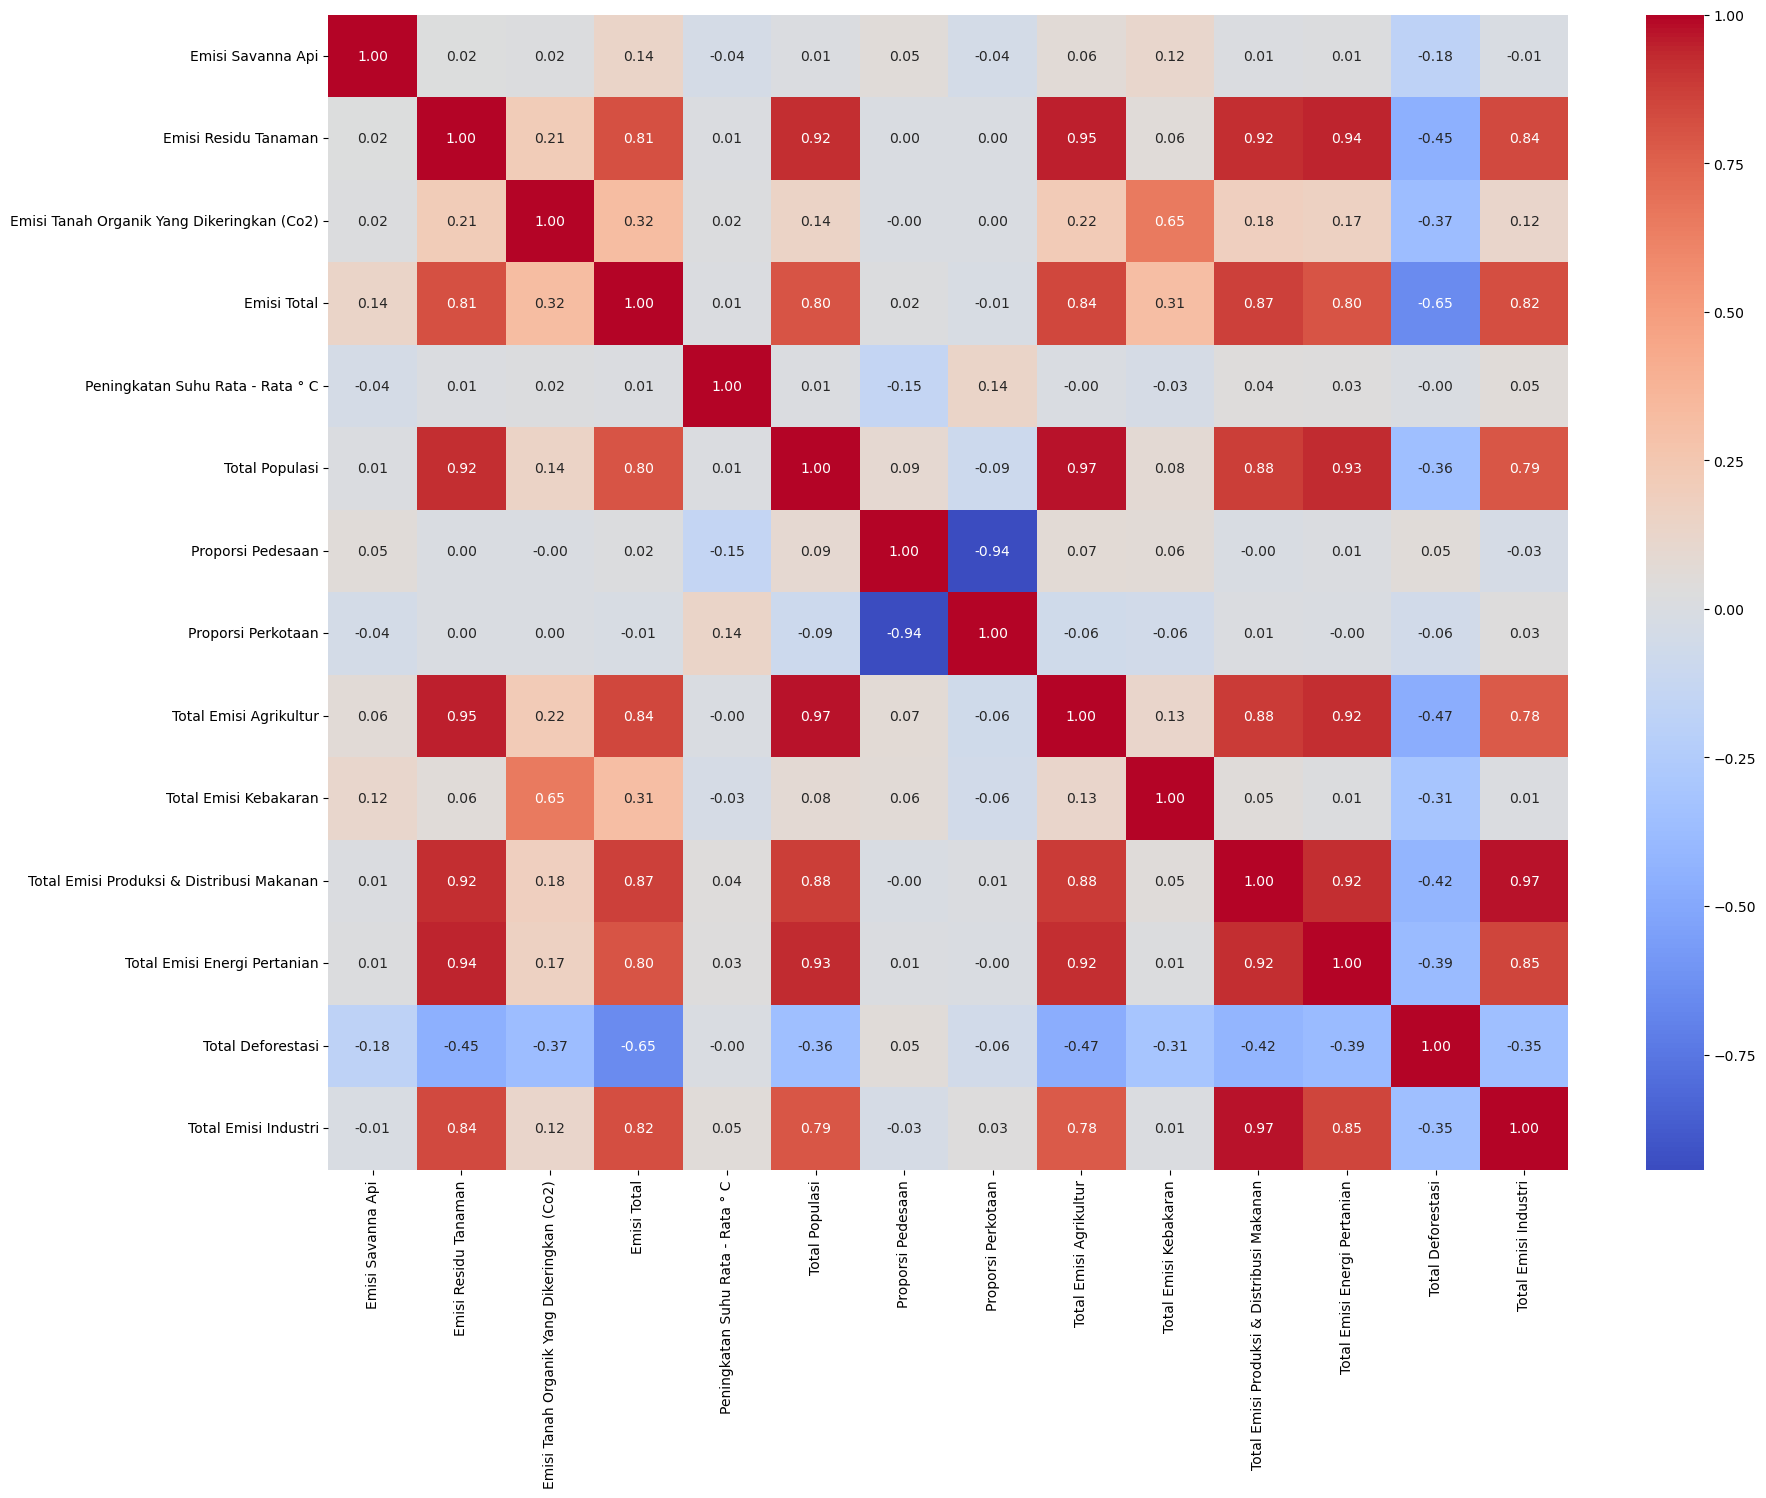

In [ ]:
# Melihat korelasi fitur untuk menemukan fitur yang berkorelasi
import matplotlib.pyplot as plt

# Mengukur korelasi antara emisi
num_cols = train_set.select_dtypes(include=['int64', 'float64']).columns
train_set[num_cols].corr()

# Matriks heatmap korelasi
corr_matrix = train_set[num_cols].corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()



In [ ]:
%pip install scikit-learn

import sklearn 
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

# Contoh: Membaca dataset
# df = pd.read_csv("data.csv")

# Memilih fitur numerik untuk polinomial
numerical_features = [
    "Total Populasi", "Proporsi Pedesaan", "Proporsi Perkotaan",
    "Total Emisi Agrikultur", "Total Emisi Kebakaran", "Total Emisi Produksi & Distribusi Makanan",
    "Total Emisi Energi Pertanian", "Total Deforestasi", "Total Emisi Industri"
]

# Mengisi nilai NaN dengan median agar tidak ada error saat transformasi
train_set[numerical_features] = train_set[numerical_features].fillna(train_set[numerical_features].median())

# Membuat fitur polinomial derajat 2
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly_features = poly.fit_transform(train_set[numerical_features])

# Membuat DataFrame baru dengan nama kolom yang sesuai
poly_feature_names = poly.get_feature_names_out(numerical_features)
train_set_poly = pd.DataFrame(poly_features, columns=poly_feature_names)

# Menggabungkan fitur polinomial dengan dataset asli
train_set = pd.concat([train_set, train_set_poly], axis=1)

# Menampilkan dataset dengan fitur polinomial
print(train_set.head())


Note: you may need to restart the kernel to use updated packages.
   Emisi Savanna Api  Emisi Residu Tanaman  \
0            14.7237              205.6077   
1            14.7237              209.4971   
3            14.7237              230.8175   
4            14.7237              242.0494   
6            38.9302              249.0364   

   Emisi Tanah Organik Yang Dikeringkan (Co2)  Emisi Total  \
0                                         0.0  2198.963539   
1                                         0.0  2323.876629   
3                                         0.0  2368.470529   
4                                         0.0  2500.768729   
6                                         0.0  2838.921329   

   Peningkatan Suhu Rata - Rata ° C       Negara Tahun  Total Populasi  \
0                          0.536167  Afghanistan  1990      10694796.0   
1                          0.020667  Afghanistan  1991      10745167.0   
3                          0.101917  Afghanistan  1993      14

C:\Users\ASUS ExpertBook\AppData\Local\Temp\ipykernel_13208\2823883944.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set[numerical_features] = train_set[numerical_features].fillna(train_set[numerical_features].median())
